In [31]:
# Libraries we are going to use here #
library(dplyr)
library(caTools)
library(caret)
library(InformationValue)
library(arm)

Warning message:
"package 'arm' was built under R version 3.5.2"Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: Matrix
Loading required package: lme4

arm (Version 1.10-1, built: 2018-4-12)

Working directory is C:/Users/user



In [1]:
# Importing RealEstate Data-Set #
realestate<-read.csv("F:\\melb.realstate.all.files\\InputDatasets\\realestate.derived.without.year.csv", header = T, stringsAsFactors = F, strip.white = T, sep = ',')
str(realestate)

'data.frame':	8216 obs. of  22 variables:
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "48 Abbotsford St" "124 Yarra St" "22 Park St" "3/72 Charles St" ...
 $ Rooms       : int  3 3 4 4 3 3 3 3 3 3 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : int  1447500 1876000 1985000 1330000 1465000 850000 1350000 1200000 1195000 1165000 ...
 $ Method      : chr  "PI" "S" "S" "PI" ...
 $ SellerG     : chr  "Nelson" "Nelson" "Biggin" "Kay" ...
 $ Date        : chr  "22-08-16" "07-05-16" "12-11-16" "18-03-17" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  3 4 4 4 3 3 3 3 3 3 ...
 $ Bathroom    : int  3 2 2 2 2 2 2 2 2 2 ...
 $ Car         : int  1 0 1 2 0 1 2 1 1 0 ...
 $ Landsize    : num  166 245 194 780 134 ...
 $ BuildingArea: num  174 210 123 135 150 ...
 $ CouncilArea : chr  "Yarra" "Yarra" "Yarra" "Yarr

In [2]:
# Filtering on basis of Type for further imputation #
realestate.hu<-subset(realestate, Type %in% c("h","u"))
realestate.th<-subset(realestate, Type %in% c("t","h"))
realestate.ut<-subset(realestate, Type %in% c("u","t"))
str(realestate.hu)

'data.frame':	7537 obs. of  22 variables:
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "48 Abbotsford St" "124 Yarra St" "22 Park St" "3/72 Charles St" ...
 $ Rooms       : int  3 3 4 4 3 3 3 3 3 3 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : int  1447500 1876000 1985000 1330000 1465000 850000 1350000 1200000 1195000 1165000 ...
 $ Method      : chr  "PI" "S" "S" "PI" ...
 $ SellerG     : chr  "Nelson" "Nelson" "Biggin" "Kay" ...
 $ Date        : chr  "22-08-16" "07-05-16" "12-11-16" "18-03-17" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  3 4 4 4 3 3 3 3 3 3 ...
 $ Bathroom    : int  3 2 2 2 2 2 2 2 2 2 ...
 $ Car         : int  1 0 1 2 0 1 2 1 1 0 ...
 $ Landsize    : num  166 245 194 780 134 ...
 $ BuildingArea: num  174 210 123 135 150 ...
 $ CouncilArea : chr  "Yarra" "Yarra" "Yarra" "Yarr

In [3]:
# Logistic Reg for "hu"  for finding the type #
realestate.hu$Suburb<-as.factor(realestate.hu$Suburb)
realestate.hu$Rooms<-as.factor(realestate.hu$Rooms)
realestate.hu$Bathroom<-as.factor(realestate.hu$Bathroom)
realestate.hu$Bedroom2<-as.factor(realestate.hu$Bedroom2)
realestate.hu$CouncilArea<-as.factor(realestate.hu$CouncilArea)


In [6]:
realestate.hu <- mutate(realestate.hu, TypeValue = ifelse(realestate.hu$Type == "h",0,1))


In [7]:
# Logistic Reg on Type "hu" #
crsval.hu <- caret::trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE)
glm.hu<- caret::train(TypeValue ~ Price+BuildingArea+Rooms+Suburb, data = realestate.hu, method="glm", family="binomial", trControl = crsval.hu, tuneLength = 10, control = list(maxit = 100))

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."Warning message:
"package 'caret' was built under R version 3.5.2"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted prob

,0,1
0,6575,317
1,32,613


[1] 0.6591398

[1] 0.9951567

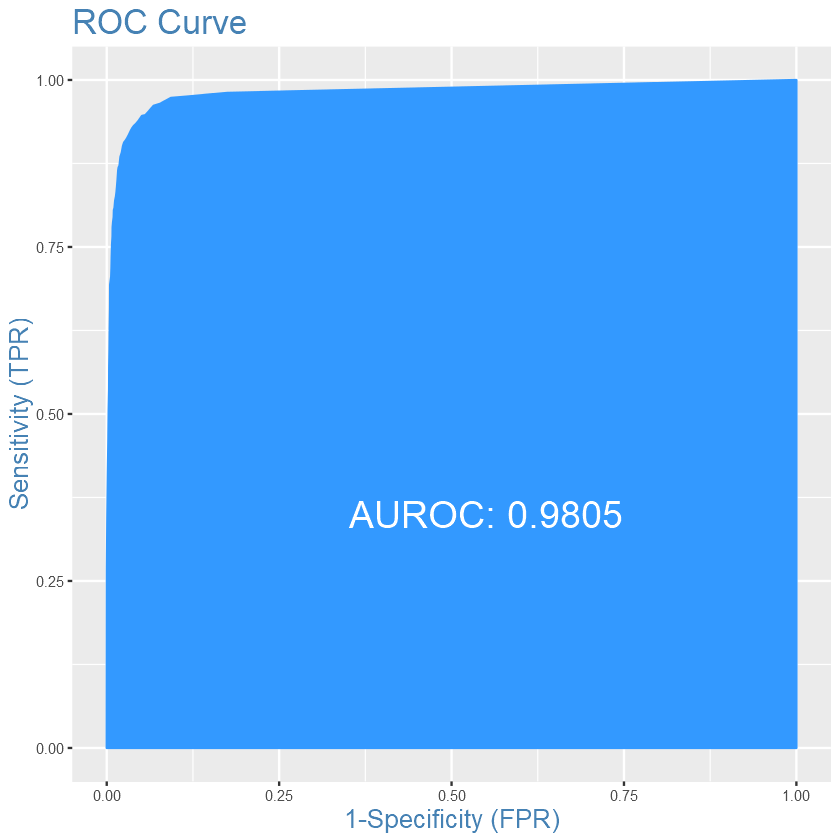

In [8]:
# Prediction #
pred.hu<- predict(glm.hu, realestate.hu)
# Confusion Matrix on "hu" Type#
InformationValue::confusionMatrix(realestate.hu$TypeValue, pred.hu>=0.8)
# Plotting the ROC curve #
InformationValue::plotROC(realestate.hu$TypeValue,pred.hu)
# Sensitivity #
InformationValue::sensitivity(realestate.hu$TypeValue,pred.hu, threshold = 0.8)
# Specifity #
InformationValue::specificity(realestate.hu$TypeValue,pred.hu, threshold = 0.8)


In [9]:
# Spliting data into training and test # 
library(caTools)
set.seed(23)
split.re.hu = sample.split(realestate.hu$Type, SplitRatio = 0.7)
training.re.hu = subset(realestate.hu, split.re.hu == TRUE)
test.re.hu = subset(realestate.hu, split.re.hu == FALSE)

In [10]:
# Building model on train data and testing it on test data for "HU" Type#

glm.train.hu<- caret::train(TypeValue ~ Price+BuildingArea+Rooms+Suburb, data = training.re.hu, method="glm", family="binomial", trControl = crsval.hu, tuneLength = 10, control = list(maxit = 100))

pred.test.hu<- predict(glm.train.hu, test.re.hu)

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(ob

,0,1
0,1964,95
1,18,184


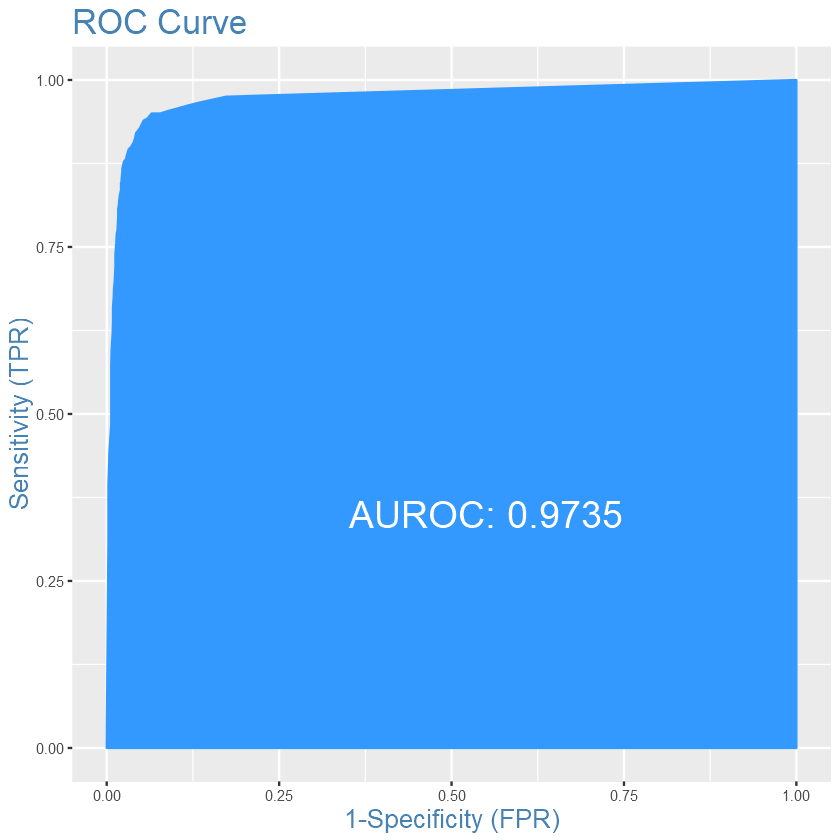

In [11]:
# Confusion Matrix and ROC curve #
InformationValue::confusionMatrix(test.re.hu$TypeValue, pred.test.hu >= 0.8)
InformationValue::plotROC(test.re.hu$TypeValue, pred.test.hu)

In [12]:
# Specifity and Senstivity #
InformationValue::sensitivity(test.re.hu$TypeValue,pred.test.hu, threshold = 0.8)
InformationValue::specificity(test.re.hu$TypeValue,pred.test.hu, threshold = 0.8)

[1] 0.6594982

[1] 0.9909183

In [13]:
# Logistic Reg for "th" for finding the type #
realestate.th$Suburb<-as.factor(realestate.th$Suburb)
realestate.th$Rooms<-as.factor(realestate.th$Rooms)
realestate.th$Bathroom<-as.factor(realestate.th$Bathroom)
realestate.th$Bedroom2<-as.factor(realestate.th$Bedroom2)
realestate.th$CouncilArea<-as.factor(realestate.th$CouncilArea)

realestate.th <- mutate(realestate.th, TypeValue = ifelse(realestate.th$Type == "h",0,1))

In [14]:
# Building the Model #
crsval.th <- caret::trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE)

glm.th<- glm(TypeValue ~ Price+BuildingArea+Rooms+Distance+Bathroom+Landsize+CouncilArea, data = realestate.th, family="binomial", control = list(maxit = 100))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,0,1
0,6260,327
1,347,352


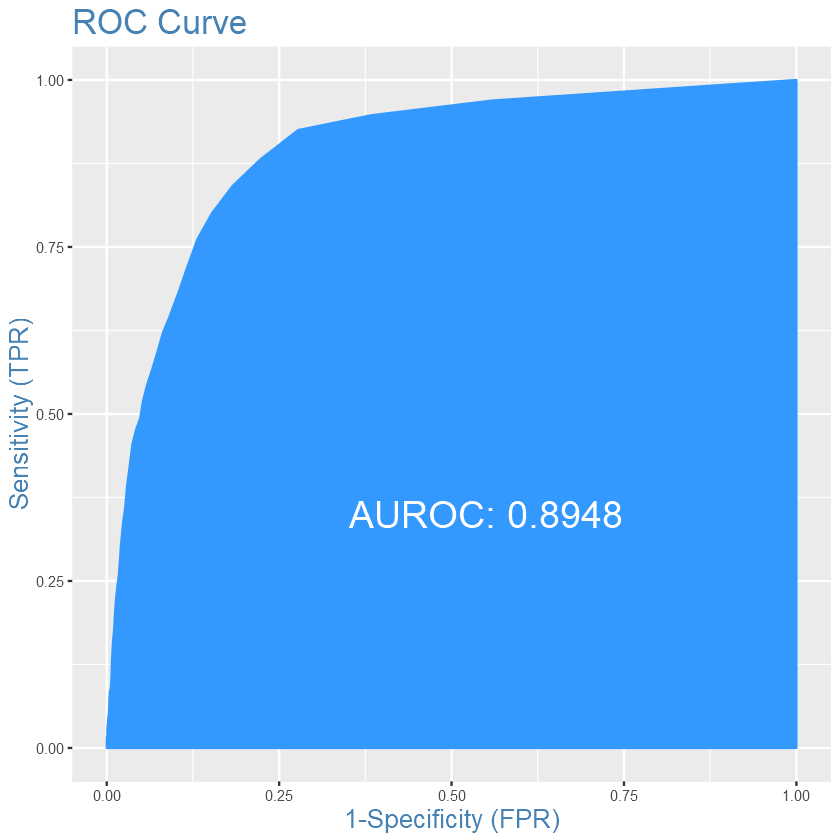

In [15]:
# Prediction, Confusion Matrix and ROC Curve #
pred.th<- predict(glm.th, realestate.th, type = "response")
InformationValue::confusionMatrix(realestate.th$TypeValue, pred.th >= 0.3)
InformationValue::plotROC(realestate.th$TypeValue,pred.th)

In [16]:
# SPECIFICITY and SENSTIVITY #
InformationValue::sensitivity(realestate.th$TypeValue,pred.th, threshold = 0.3)
InformationValue::specificity(realestate.th$TypeValue,pred.th, threshold = 0.3)


[1] 0.5184094

[1] 0.9474799

In [17]:
# Spliting data into training and test # 
library(caTools)
set.seed(23)
split.re.th = sample.split(realestate.th$Type, SplitRatio = 0.7)
training.re.th = subset(realestate.th, split.re.th == TRUE)
test.re.th = subset(realestate.th, split.re.th == FALSE)

In [18]:
# Building model on train data and testing it on test data for "TH" Type#
glm.train.th<- glm(TypeValue ~ Price+BuildingArea+Rooms+Distance+Bathroom+Landsize+CouncilArea, data = training.re.th, family="binomial", control = list(maxit = 100))

pred.test.th<- predict(glm.train.th, test.re.th)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,0,1
0,1962,173
1,20,31


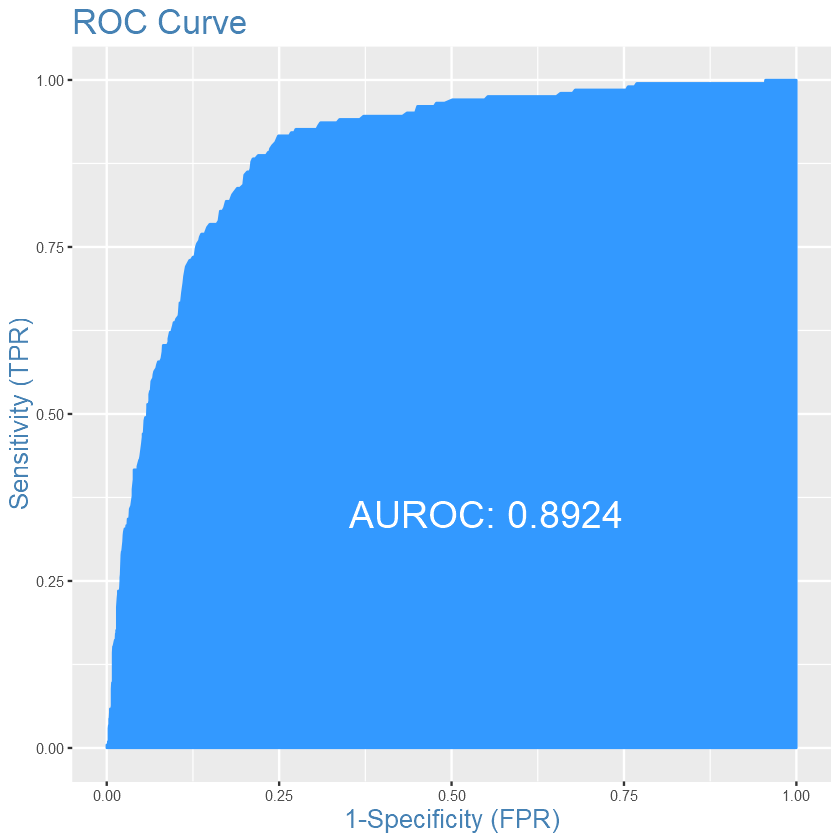

In [19]:
# Confusion Matrix and ROC Curve on Test data for "TH" Type #
InformationValue::confusionMatrix(test.re.th$TypeValue, pred.test.th >= 0.3)
InformationValue::plotROC(test.re.th$TypeValue, pred.test.th)

In [20]:
# SPECIFICITY and SENSTIVITY #
InformationValue::sensitivity(test.re.th$TypeValue,pred.test.th, threshold = 0.3)
InformationValue::specificity(test.re.th$TypeValue,pred.test.th, threshold = 0.3)

[1] 0.1519608

[1] 0.9899092

In [21]:
# Logistic Reg for "ut" for finding the type #
realestate.ut $Suburb<-as.factor(realestate.ut $Suburb)
realestate.ut $Rooms<-as.factor(realestate.ut $Rooms)
realestate.ut $Bathroom<-as.factor(realestate.ut $Bathroom)
realestate.ut $Bedroom2<-as.factor(realestate.ut $Bedroom2)
realestate.ut $CouncilArea<-as.factor(realestate.ut $CouncilArea)

realestate.ut  <- mutate(realestate.ut , TypeValue = ifelse(realestate.ut $Type == "t",0,1))

In [22]:
# Building the model #
crsval.ut <- caret::trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE)

glm.ut<- caret::train(TypeValue ~ Price+BuildingArea+Rooms+Suburb, data = realestate.ut, method="glm", family="binomial", trControl = crsval.ut, tuneLength = 10, control = list(maxit = 100))


Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(ob

,0,1
0,647,179
1,32,751


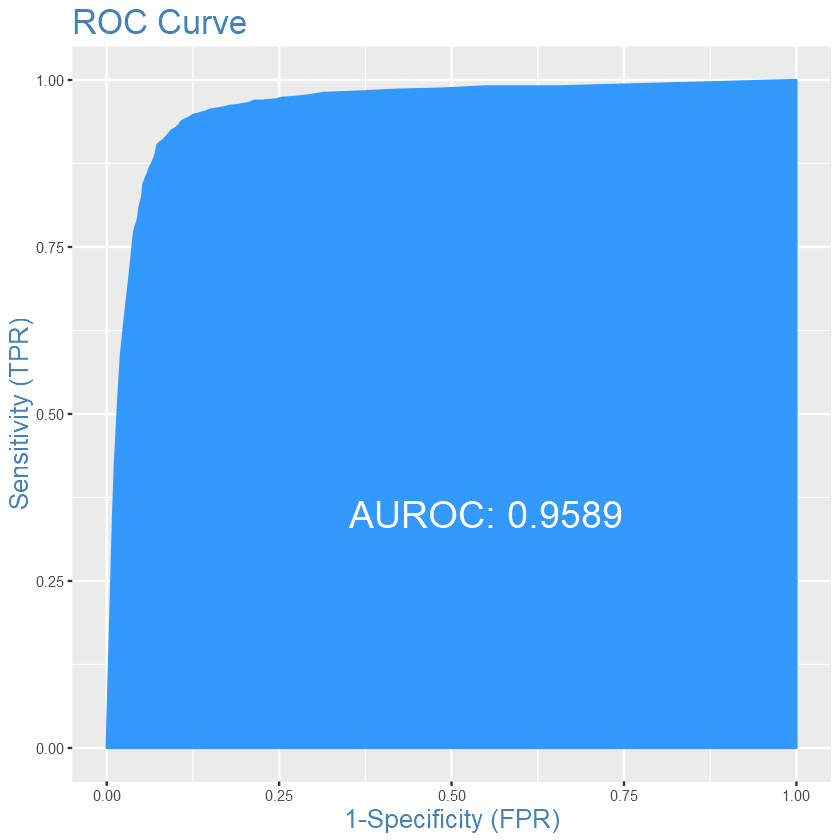

In [23]:
# Prediction, Confusion Matrix and ROC Curve #
pred.ut <- predict(glm.ut , realestate.ut )
InformationValue::confusionMatrix(realestate.ut $TypeValue, pred.ut  >= 0.8)
InformationValue::plotROC(realestate.ut $TypeValue,pred.ut )


In [24]:
# SPECIFICITY and SENSTIVITY #
InformationValue::sensitivity(realestate.ut$TypeValue,pred.ut, threshold = 0.8)
InformationValue::specificity(realestate.ut$TypeValue,pred.ut, threshold = 0.8)

[1] 0.8075269

[1] 0.9528719

In [25]:
# Spliting data into training and test for "UT" Type # 
library(caTools)
set.seed(23)
split.re.ut  = sample.split(realestate.ut $Type, SplitRatio = 0.7)
training.re.ut  = subset(realestate.ut , split.re.ut  == TRUE)
test.re.ut  = subset(realestate.ut , split.re.ut  == FALSE)

In [26]:
# Building model on train data and testing it on test data for "UT" Type#
glm.train.ut <- caret::train(TypeValue ~ Price+BuildingArea+Rooms+Suburb, data = training.re.ut , method="glm", family="binomial", trControl = crsval.ut , tuneLength = 10, control = list(maxit = 100))

pred.test.ut <- predict(glm.train.ut , test.re.ut )

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(ob

,0,1
0,179,51
1,25,228


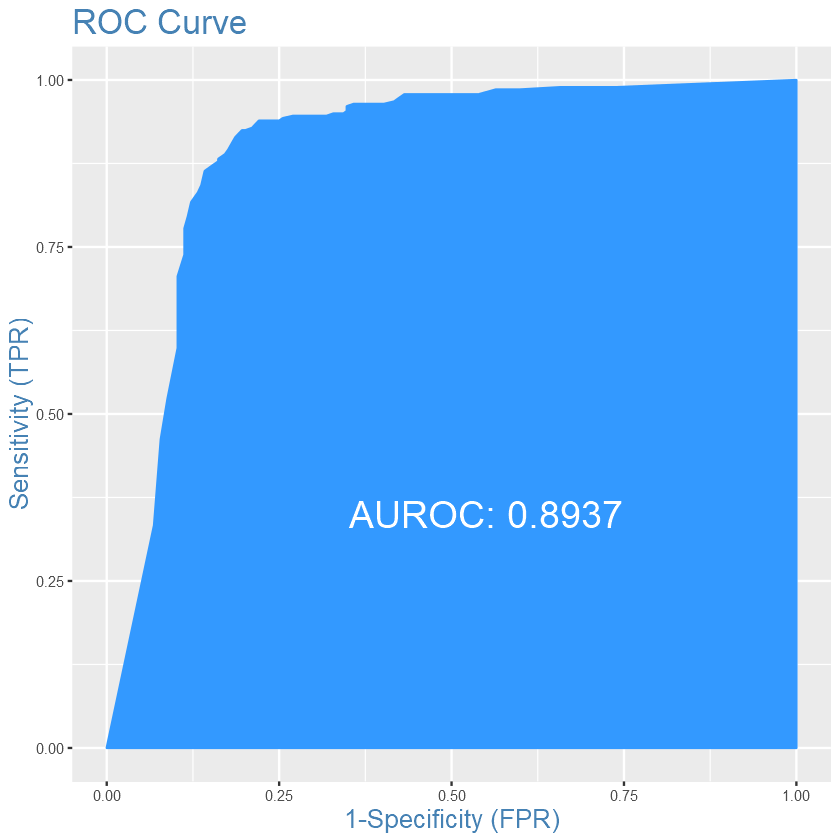

In [27]:
# Confusion Matrix and ROC Curve #
InformationValue::confusionMatrix(test.re.ut $TypeValue, pred.test.ut  >= 0.8)
InformationValue::plotROC(test.re.ut $TypeValue, pred.test.ut )

In [28]:
# SPECIFICITY and SENSTIVITY ##
InformationValue::sensitivity(test.re.ut$TypeValue,pred.test.ut, threshold = 0.8)
InformationValue::specificity(test.re.ut$TypeValue,pred.test.ut, threshold = 0.8)

[1] 0.8172043

[1] 0.877451

In [32]:

bglm.hu<-bayesglm(TypeValue ~ Price+BuildingArea+Rooms+Suburb+Landsize+Bathroom+CouncilArea+Distance, data = realestate.hu, family = binomial(link = "logit"))

Warning message:
"fitted probabilities numerically 0 or 1 occurred"